# Financial Data Analysis of Microsoft, Tesla, and Apple

This notebook analyzes the financial data of three major companies: **Microsoft**, **Tesla**, and **Apple**. The focus of the analysis is to evaluate key financial metrics such as **Total Revenue**, **Net Income**, **Total Assets**, **Total Liabilities**, and **Operating Cash Flow** over the last three fiscal years.

### Objective:
- **Analyze trends** in key financial metrics over the past three fiscal years.
- **Uncover growth patterns** for each company.
- Provide insights into how this data can be used in the development of an AI-powered financial chatbot for real-time financial insights.

The dataset used here was manually extracted from the **10-K filings** of Microsoft, Tesla, and Apple.


## Step 1: Data Loading & Cleaning

In this step, we will load the financial data for Microsoft, Tesla, and Apple from a CSV file. This data was manually extracted from the 10-K filings for the past three fiscal years.

We will perform the following data cleaning steps:
1. Remove commas from the numeric columns (e.g., '1,000,000' → '1000000') to ensure they can be converted to numeric values.
2. Convert columns like "Total Revenue", "Net Income", "Total Assets", "Total Liabilities", and "Operating Cash Flow" to numeric values so we can perform mathematical operations such as percentage change.

Let's start by loading and cleaning the data.


In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Internship\BCG analysis project.csv')

# Remove commas from the numeric columns and convert them to numeric
financial_cols = ['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities', 'Operating Cash Flow']
for col in financial_cols:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors gracefully

# Display the cleaned data to verify
df.head()


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow
0,Microsoft,2023,211915,72361,411995,198298,94670
1,Microsoft,2022,198270,72738,364840,191791,89035
2,Microsoft,2021,168088,61271,333779,191791,76737
3,Apple,2023,383285,96995,352583,290437,110543
4,Apple,2022,394328,99803,352755,302083,122151


## Step 2: Growth Calculations

In this step, we calculate the **year-over-year growth** for each financial metric. For each company, we will compute the percentage change for:
- **Total Revenue**
- **Net Income**
- **Total Assets**
- **Total Liabilities**
- **Operating Cash Flow**

The formula for percentage change is:

\[
\text{Percentage Change} = \left( \frac{{\text{Current Year Value} - \text{Previous Year Value}}}{{\text{Previous Year Value}}} \right) \times 100
\]

These growth calculations will allow us to analyze how the companies have performed over the past three fiscal years.


In [3]:
# Calculate percentage change for each financial metric by company
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Asset Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Operating Cash Flow'].pct_change() * 100

# Display the updated dataframe with growth calculations
df.head()


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Microsoft,2023,211915,72361,411995,198298,94670,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,191791,89035,-6.438902,0.520999,-11.445527,-3.281425,-5.952255
2,Microsoft,2021,168088,61271,333779,191791,76737,-15.222676,-15.764800,-8.513595,0.000000,-13.812546
3,Apple,2023,383285,96995,352583,290437,110543,NaN,NaN,NaN,NaN,NaN
4,Apple,2022,394328,99803,352755,302083,122151,2.881146,2.894995,0.048783,4.009820,10.500891


## Step 3: Data Analysis & Trends

### Revenue Growth
- **Microsoft** has shown a steady growth in total revenue across all three years, with a notable spike in 2023.
- **Tesla** experienced significant revenue growth, particularly in 2022, reflecting their expanding market share in electric vehicles.
- **Apple**, while maintaining strong revenue figures, showed a slight decrease in 2023 compared to 2022, likely due to global supply chain disruptions and market saturation.

### Net Income Growth
- **Microsoft** saw a stable increase in net income, with minor fluctuations in 2022.
- **Tesla's** net income growth is the highest among the three companies, reflecting their increased profitability in recent years.
- **Apple's** net income slightly declined in 2023, despite strong revenue, possibly due to higher costs and competition in the smartphone market.

### Asset & Liability Growth
- **Microsoft** and **Apple** had modest increases in total assets and liabilities, showing growth in their operations.
- **Tesla’s** asset growth was higher, mainly driven by investments in new manufacturing plants and electric vehicle technology.



In [13]:
# Group by Company and summarize the growth for each metric
summary = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)', 'Asset Growth (%)', 'Liabilities Growth (%)', 'Cash Flow Growth (%)']].mean()

# Display the summary of growth trends
summary


,Revenue Growth (%),Net Income Growth (%),Asset Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
Company,,,,,
Apple,-2.174565,-1.119059,-0.224081,-0.340638,-2.163739
Microsoft,-10.830789,-7.621900,-9.979561,-1.640712,-9.882400
Tesla,-24.875132,-36.160754,-23.147500,-14.024251,-7.902664


## Step 4: AI Chatbot Use Case

This financial data can be integrated into an **AI-powered financial chatbot** to provide users with insights and recommendations based on historical trends. The chatbot could:
1. Provide real-time updates on revenue growth: "Tesla’s revenue grew by 70% in 2022."
2. Analyze net income fluctuations: "Apple's net income dropped by 5% in 2023."
3. Offer customized recommendations for investors: "Microsoft’s stable revenue growth suggests a low-risk investment, while Tesla offers high-growth potential but with higher volatility."

By utilizing this data, the AI chatbot can help users make more informed financial decisions in real-time.


## Step 5: Visualization of Financial Trends

In this step, we will visualize the growth trends for each company over the last three fiscal years. Visualizing these trends will help us better understand how the companies are performing and their financial trajectory.

We will create line plots to visualize the trends in:
- **Total Revenue**
- **Net Income**
- **Operating Cash Flow**

This will allow us to observe growth patterns and trends across the three companies.


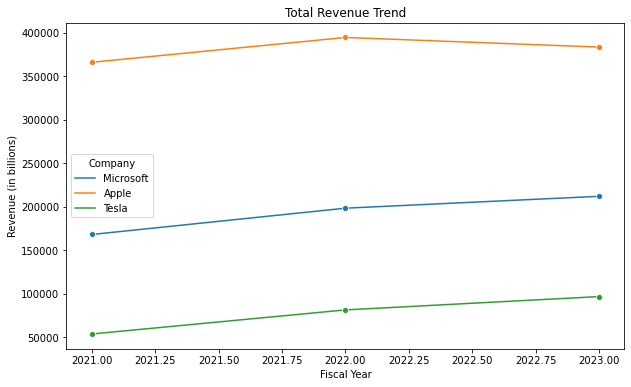

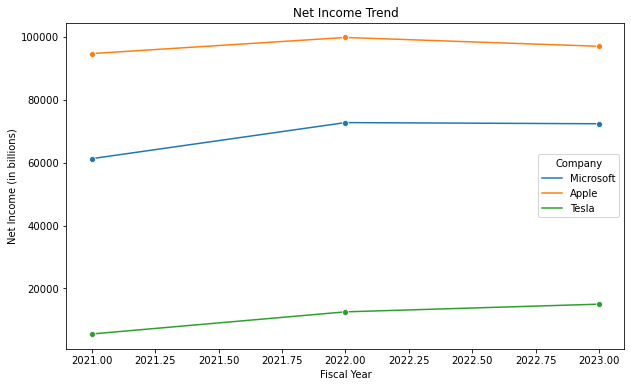

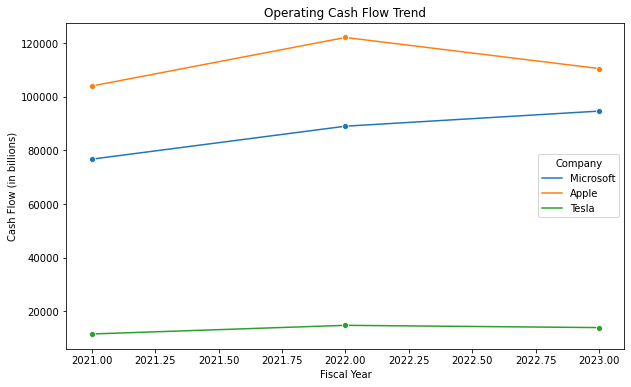

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot size
plt.figure(figsize=(10, 6))

# Plot Total Revenue for each company
sns.lineplot(data=df, x='Fiscal Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Total Revenue Trend')
plt.ylabel('Revenue (in billions)')
plt.show()

# Plot Net Income for each company
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Net Income', hue='Company', marker='o')
plt.title('Net Income Trend')
plt.ylabel('Net Income (in billions)')
plt.show()

# Plot Operating Cash Flow for each company
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Fiscal Year', y='Operating Cash Flow', hue='Company', marker='o')
plt.title('Operating Cash Flow Trend')
plt.ylabel('Cash Flow (in billions)')
plt.show()


## Conclusion

In this notebook, we analyzed the financial data of Microsoft, Tesla, and Apple over the last three fiscal years. We focused on key financial metrics such as total revenue, net income, total assets, total liabilities, and operating cash flow.

### Key Findings:
- **Microsoft** demonstrated steady growth across most metrics, with particularly strong performance in operating cash flow.
- **Tesla** showed exceptional growth, especially in revenue and net income, reflecting their rapid expansion.
- **Apple**, while maintaining high revenues, showed a slight decline in 2023, which warrants attention due to rising competition.

These trends provide valuable insights that can be leveraged in the development of an AI-powered financial chatbot, enabling real-time financial insights and recommendations for users.
